<a href="https://colab.research.google.com/github/mrudulmamtani/BSEforecast/blob/main/LSTM_CodeTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^BSESN', start = '2012-03-11', end = '2024-04-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,17772.099609,17772.099609,17494.650391,17587.669922,17587.669922,12200
2012-03-13,17680.230469,17842.919922,17680.230469,17813.619141,17813.619141,12800
2012-03-14,18003.150391,18040.689453,17837.220703,17919.300781,17919.300781,14200
2012-03-15,17916.849609,17918.250000,17622.130859,17675.849609,17675.849609,13800
2012-03-16,17656.810547,17871.000000,17426.580078,17466.199219,17466.199219,24800
2012-03-19,17531.470703,17561.460938,17226.429688,17273.369141,17273.369141,13800
2012-03-20,17308.890625,17410.130859,17211.730469,17316.179688,17316.179688,14200
2012-03-21,17301.160156,17622.869141,17275.880859,17601.710938,17601.710938,14200
2012-03-22,17586.060547,17687.009766,17136.500000,17196.470703,17196.470703,17600


In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,18784.750000,18801.099609,18549.279297,18577.699219,53.815847,18587.187395,17755.382318,17339.759681,-56.951172,0,18610.769531
1,18667.720703,18705.189453,18535.369141,18610.769531,54.690658,18589.433313,17772.320678,17356.594249,138.330078,1,18791.929688
2,18653.599609,18806.560547,18576.410156,18791.929688,59.223952,18608.718682,17792.510956,17375.605314,-85.689453,0,18682.310547
3,18768.000000,18769.589844,18611.759766,18682.310547,55.616374,18615.727431,17810.130750,17392.912668,137.509766,1,18793.439453
4,18655.929688,18809.279297,18600.880859,18793.439453,58.370736,18632.652386,17829.602209,17411.462692,-93.599609,0,18710.019531
5,18803.619141,18812.929688,18689.380859,18710.019531,55.595841,18640.020685,17847.036215,17428.662120,46.220703,1,18758.630859
6,18712.410156,18789.919922,18699.070312,18758.630859,56.875821,18651.316892,17865.087594,17446.277600,-20.179688,0,18635.820312
7,18656.000000,18743.410156,18572.019531,18635.820312,52.759217,18649.841027,17880.349628,17462.033133,-211.160156,0,18430.849609
8,18642.009766,18718.279297,18393.419922,18430.849609,46.713186,18628.984702,17891.250618,17474.865139,68.591797,1,18505.380859
9,18436.789062,18521.619141,18398.480469,18505.380859,48.990550,18617.212907,17903.411613,17488.514354,73.798828,1,18561.699219


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.01645934 0.01231797 0.01932131 ... 0.40940269 0.         0.01240151]
 [0.01439548 0.01062844 0.01907711 ... 0.44854757 1.         0.01558889]
 [0.01414645 0.01241417 0.01979762 ... 0.403642   0.         0.01366022]
 ...
 [0.99750252 0.99352498 0.98376174 ... 0.41304023 0.         0.99130347]
 [0.9952664  0.99104791 0.99186908 ... 0.45831617 1.         1.        ]
 [1.         1.         1.         ... 0.3325032  0.         0.99896551]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2815
[[[1.64593429e-02 1.23179688e-02 1.93213149e-02 ... 5.45061913e-04
   0.00000000e+00 0.00000000e+00]
  [1.43954797e-02 1.06284417e-02 1.90771115e-02 ... 5.85954382e-04
   3.17104891e-04 3.20777215e-04]
  [1.41464479e-02 1.24141672e-02 1.97976177e-02 ... 9.37092072e-04
   6.95089269e-04 6.83026889e-04]
  ...
  [1.80267960e-02 1.94387822e-02 2.50155533e-02 ... 1.51097902e-03
   6.92050857e-03 7.50332651e-03]
  [2.43062185e-02 2.23871112e-02 3.05047117e-02 ... 2.72422461e-03
   7.37087346e-03 7.90873981e-03]
  [2.63013311e-02 2.31577993e-02 3.17511707e-02 ... 3.76195962e-03
   7.79950087e-03 8.30005610e-03]]

 [[1.43954797e-02 1.06284417e-02 1.90771115e-02 ... 5.85954382e-04
   3.17104891e-04 3.20777215e-04]
  [1.41464479e-02 1.24141672e-02 1.97976177e-02 ... 9.37092072e-04
   6.95089269e-04 6.83026889e-04]
  [1.61639493e-02 1.17629014e-02 2.04182070e-02 ... 1.06470363e-03
   1.02495135e-03 1.01281290e-03]
  ...
  [2.43062185e-02 2.23871112e-02 3.05047117e-02 ... 2.72422461e-03
   7.

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2228
(2228, 30, 8)
(557, 30, 8)
(2228, 1)
(557, 1)
[[0.02614424]
 [0.02781466]
 [0.02671148]
 ...
 [0.70989323]
 [0.72624534]
 [0.73808122]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
134/134 [==============================] - 11s 37ms/step - loss: 0.0019 - val_loss: 3.2869e-04
Epoch 2/30
134/134 [==============================] - 5s 39ms/step - loss: 1.5257e-04 - val_loss: 2.2395e-04
Epoch 3/30
134/134 [==============================] - 5s 37ms/step - loss: 1.2944e-04 - val_loss: 2.3345e-04
Epoch 4/30
134/134 [==============================] - 4s 33ms/step - loss: 1.2058e-04 - val_loss: 2.3212e-04
Epoch 5/30
134/134 [==============================] - 6s 44ms/step - loss: 1.2345e-04 - val_loss: 2.2736e-04
Epoch 6/30
134/134 [==============================] - 4s 33ms/step - loss: 1.3558e-04 - val_loss: 2.6699e-04
Epoch 7/30
134/134 [==============================] - 4s 33ms/step - loss: 1.1622e-04 - val_loss: 2.1438e-04
Epoch 8/30
134/134 [==============================] - 5s 41ms/step - loss: 1.0340e-04 - val_loss: 2.4522e-04
Epoch 9/30
134/134 [==============================] - 4s 32ms/step - loss: 1.2376e-04 - val_loss: 2.1040e-04
Epoch 10/30
134/134 [=

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 [==============================] - 1s 14ms/step
[0.70871043] [0.74454218]
[0.7220711] [0.73361069]
[0.7299026] [0.7361233]
[0.71723104] [0.74757685]
[0.7206849] [0.75146979]
[0.7331718] [0.76085017]
[0.7389332] [0.76235029]
[0.7488988] [0.76213441]
[0.75149965] [0.76364539]
[0.74987495] [0.75389726]


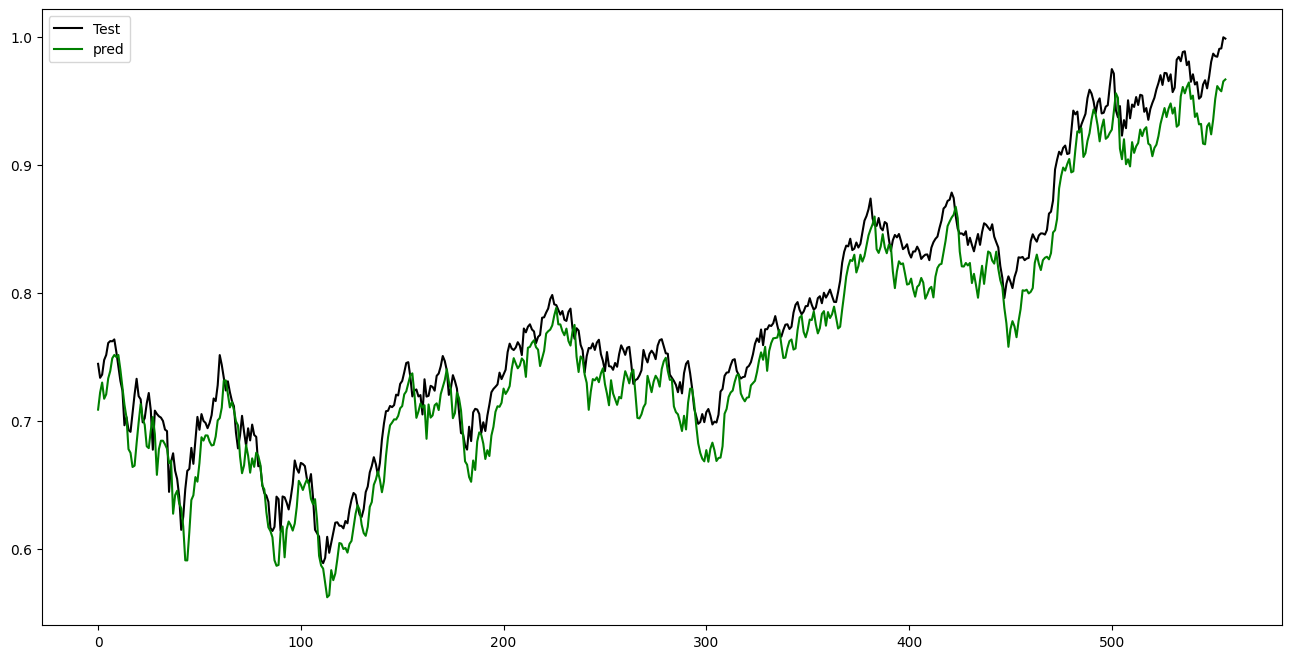

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_squared = r2_score(y_test, y_pred)
print('R2 Score:', r2_squared)


R2 Score: 0.9319146759147537
